This is an end to end example of how to train a transformer on a process, probe it's internal activations for the MSP structure, and visualize it

Installing all the dependencies into the .venv

Now we set up all of the necessary configs for training a model #TODO: Put some explanation of all of the configs

In [1]:
import pathlib

from epsilon_transformers.training.configs.training_configs import TrainConfig, OptimizerConfig, ProcessDatasetConfig, PersistanceConfig, LoggingConfig
from epsilon_transformers.training.configs.model_configs import RawModelConfig
from epsilon_transformers.training.train import train_model


model_config = RawModelConfig(
            d_vocab=2,
            d_model=100,
            n_ctx=10,
            d_head=48,
            n_head=12,
            d_mlp=12,
            n_layers=2,
        )

optimizer_config = OptimizerConfig(
    optimizer_type='adam',
    learning_rate=1.06e-4,
    weight_decay=0.8
)

dataset_config = ProcessDatasetConfig(
    process='z1r',
    batch_size=5,
    num_tokens=50000,
    test_split=0.15
)

persistance_config = PersistanceConfig(
    location='local',
    checkpoint_dir=pathlib.Path('/root/epsilon-transformers/temp_models'), # Temporary Hack. Don't run this in local
    checkpoint_every_n_tokens=10000
)

mock_config = TrainConfig(
    model=model_config,
    optimizer=optimizer_config,
    dataset=dataset_config,
    persistance=persistance_config,
    logging=LoggingConfig(project_name="testing-model-training", wandb=True),
    verbose=True,
    seed=1337
)
model, metrics = train_model(mock_config)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: melembroucarlitos44. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


This is the log
Log(train_loss=134.38645780086517, test_loss=972.6870821118355, config=LoggingConfig(local=None, wandb=True, project_name='testing-model-training', train_loss=True, test_loss=True))
This is the log
Log(train_loss=128.92947083711624, test_loss=948.7941195964813, config=LoggingConfig(local=None, wandb=True, project_name='testing-model-training', train_loss=True, test_loss=True))
This is the log
Log(train_loss=126.53875476121902, test_loss=945.2532307505608, config=LoggingConfig(local=None, wandb=True, project_name='testing-model-training', train_loss=True, test_loss=True))
This is the log
Log(train_loss=125.87654477357864, test_loss=971.8623302578926, config=LoggingConfig(local=None, wandb=True, project_name='testing-model-training', train_loss=True, test_loss=True))
This is the log
Log(train_loss=125.76160579919815, test_loss=944.0243234634399, config=LoggingConfig(local=None, wandb=True, project_name='testing-model-training', train_loss=True, test_loss=True))
This is th

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


test_loss,█▇▇█▇▇▇▇▇▇▃▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▄▄▅▆▇▇████
train_loss,████▇▇▇▇▇▇▆▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇███▁
test_loss,984.29084
train_loss,0.0


now that we have the model, we'll run the analysis on it

In [1]:
import pathlib
import torch

from epsilon_transformers.training.configs import RawModelConfig

model = model_config = RawModelConfig(
            d_vocab=2,
            d_model=100,
            n_ctx=10,
            d_head=48,
            n_head=12,
            d_mlp=12,
            n_layers=2,
        ).to_hooked_transformer(seed=1337, device='cpu')

# Load the model weights
model_path = pathlib.Path("/home/lucas/50000.pt")
# Ensure to map the model to the correct device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model
model.load_state_dict(torch.load(model_path, map_location=device))

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.2.0) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/lucas/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<All keys matched successfully>

In [2]:
from epsilon_transformers.process.processes import ZeroOneR
from epsilon_transformers.analysis.activation_analysis import find_msp_subspace_in_residual_stream

process = ZeroOneR()

ground_truth_belief_states_reshaped, predicted_beliefs = find_msp_subspace_in_residual_stream(model=model, process=process, num_sequences=1000)


And now that we have the subspace, we should go ahead and visualize it

/tmp/ipykernel_9424/1804885619.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


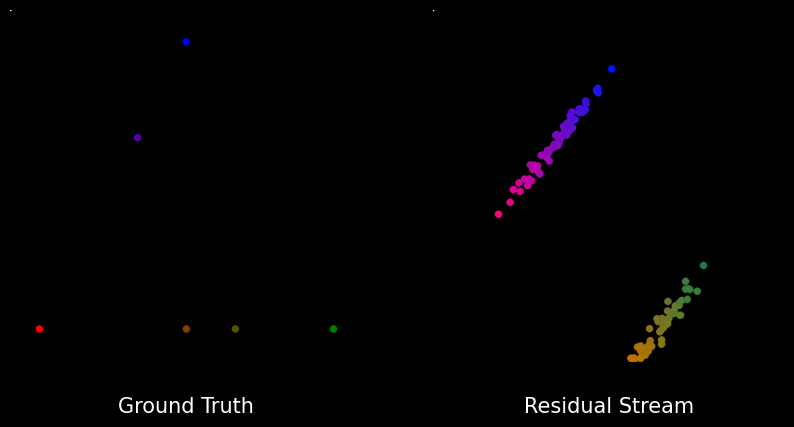

In [4]:
from epsilon_transformers.visualization.plots import plot_ground_truth_and_evaluated_2d_simplex


fig = plot_ground_truth_and_evaluated_2d_simplex(ground_truth_tensor=ground_truth_belief_states_reshaped, predicted_beliefs=predicted_beliefs, plot_triangles=True, facecolor='black', px=10)
fig.show()